Part a

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加载数据文件，并对日期进行预处理
# Load the data file and preprocess the dates.
nikkei_data = pd.read_csv('./hw1 data/nikkei_daily.txt', sep='\t', parse_dates=['Date'])
sp_data = pd.read_csv('./hw1 data/sp_daily.txt', sep=r'\s+')
ex_data = pd.read_csv('./hw1 data/ex_daily.txt', sep=r'\s+')

nikkei_data.set_index('Date', inplace=True)
sp_data['caldt'] = pd.to_datetime(sp_data['caldt'].astype(str), format='%Y%m%d')
sp_data.set_index('caldt', inplace=True)
sp_data.index.name = 'Date'
ex_data['DATE'] = pd.to_datetime(ex_data['DATE'])
ex_data.set_index('DATE', inplace=True)
ex_data.index.name = 'Date'

# 根据题目所给区间过滤指定日期范围的数据
# Filter the data within the specified date range according to the interval given in the question
start_date = '2005-01-03'
end_date = '2007-12-31'

# 获取指定日期范围内所有三个数据集都有的日期
# Obtain the dates that exist in all three datasets within the specified date range.
nikkei_dates = set(nikkei_data.loc[start_date:end_date].index)
sp_dates = set(sp_data.loc[start_date:end_date].index)
ex_dates = set(ex_data.loc[start_date:end_date].index)
common_dates = sorted(nikkei_dates & sp_dates & ex_dates)

# 创建一个包含共同日期的数据框
# Create a dataframe containing the common dates
result = pd.DataFrame(index=common_dates)
result.index.name = 'Date'

# 对每个日期，检查其是否有可用的(i-1)天数据和(i-2)天数据，以筛选出可用数据点
# For each date, check if there is available data for the (i - 1)th day and the (i - 2)th day to filter out the available data points.
for i in range(len(common_dates)):
    current_date = common_dates[i]

    prev_date = common_dates[i-1]
    prev_prev_date = common_dates[i-2]
    
    days_since_prev = (current_date - prev_date).days
    days_between_prev = (prev_date - prev_prev_date).days

    if days_since_prev == 1 and days_between_prev == 1:

        # g
        nikkei_current = nikkei_data.loc[current_date, 'Value']
        nikkei_prev = nikkei_data.loc[prev_date, 'Value']
        result.loc[current_date, 'g'] = 1 if nikkei_current > nikkei_prev else -1
        
        # x1
        result.loc[current_date, 'x1'] = sp_data.loc[current_date, 'sprtrn']
        
        # x2
        ex_prev = ex_data.loc[prev_date, 'VALUE']
        ex_prev_prev = ex_data.loc[prev_prev_date, 'VALUE']
        result.loc[current_date, 'x2'] = np.log(ex_prev) - np.log(ex_prev_prev)

result = result.dropna()

# 打印经过筛查后得到的可用数据的前几项，经过人工检验确认无误
# Print the first few items of the available data obtained after screening. Manual inspection confirms that they are correct.
print(result.head())

# 提取特征和标签
# Extract features and labels
X = result[['x1', 'x2']].values
label = result['g'].values

# 为了防止后来得到的分类器过拟合，这里划分训练集和测试集(比例8：2)以预备性能评估。因此Part c中输出的错误率其实是测试集上的。
# To prevent the classifier obtained later from overfitting, here we divide the dataset into a training set and a test set (with a ratio of 8:2) in preparation for performance evaluation. Therefore, the error rate output in Part c is actually on the test set.
X_train, X_test, label_train, label_test = train_test_split(X, label, test_size=0.2, random_state=42)

              g        x1        x2
Date                               
2005-01-06  1.0  0.003506 -0.003074
2005-01-07 -1.0 -0.001431  0.008811
2005-01-13 -1.0 -0.008630 -0.011280
2005-01-14  1.0  0.006005  0.002832
2005-01-20 -1.0 -0.007783  0.001562


Part b

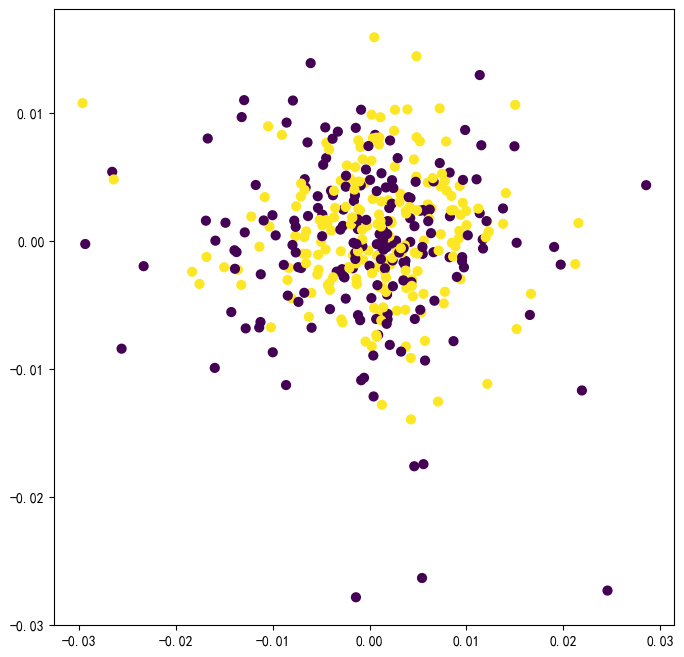

In [ ]:
# 对数据集总体进行散点图绘制
# Plot scatter plots for the overall dataset
fig, ax = plt.subplots(figsize=(8,8))
_ = ax.scatter(X[:, 0], X[:, 1], s=40, c=label, cmap='viridis')

Part c  

这部分的错误率是测试集上的

The error rate in this part is for the test set.

In [109]:
# (i).Logistic regression

logistic = LogisticRegression(random_state=0)
logistic.fit(X_train, label_train)

logistic_hat = logistic.predict(X_test)
logistic_accuracy = accuracy_score(label_test, logistic_hat)
logistic_error_rate = 1 - logistic_accuracy
print('The error rate of logistic regression on test set is: ' + f'{logistic_error_rate}')

The error rate of logistic regression on test set is: 0.4683544303797469


In [ ]:
# (ii).SVM

# 设置核为linear，C=10的支持向量机
# Set up a support vector machine with a linear kernel and C = 10
svm = SVC(C=10, kernel='linear', random_state=0)
svm.fit(X_train, label_train)

svm_hat = svm.predict(X_test)
svm_accuracy = accuracy_score(label_test, svm_hat)
svm_error_rate = 1 - svm_accuracy
print('The error rate of support vector machine on test set is: ' + f'{svm_error_rate}')

The error rate of support vector machine on test set is: 0.4683544303797469
